<a href="https://colab.research.google.com/github/Matthew-Calvario/github-introfall25-Matthew-Calvario/blob/main/lab5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [45]:
import pandas as pd
import re

df_sms = pd.read_csv("spam.csv")

spamonly = df_sms[df_sms['v1'] == 'spam']

duplicates_in_spamonly = spamonly.duplicated().sum()
print("Number of duplicate spam SMS:", duplicates_in_spamonly)

Number of duplicate spam SMS: 94


In [40]:
spamonly_no_duplicates = spamonly.drop_duplicates()
num_sms_after_dedup = len(spamonly_no_duplicates)
print(f"Total number of SMS in 'spamonly' after removing duplicates: {num_sms_after_dedup}")



Total number of SMS in 'spamonly' after removing duplicates: 653


/tmp/ipython-input-3224578867.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  spamonly_no_duplicates['char_len'] = spamonly_no_duplicates['v2'].astype(str).apply(len)


np.float64(137.89)

In [42]:
# Define df_no_duplicates_all by dropping duplicates from df_sms
df_no_duplicates_all = df_sms.drop_duplicates()

print(f"df_no_duplicates_all created with {len(df_no_duplicates_all)} unique SMS messages.")

df_no_duplicates_all created with 5169 unique SMS messages.


In [43]:
# Using df_no_duplicates_all which is already a duplicate-free DataFrame of all SMS messages

# Calculate the length of each message in the 'v2' column (characters_count)
df_no_duplicates_all.loc[:, 'characters_count'] = df_no_duplicates_all['v2'].apply(len)

# Calculate the average characters_count and round to 2 decimal places
average_characters_count_full_dataset = round(df_no_duplicates_all['characters_count'].mean(), 2)

print(f"The average length (characters_count) of all messages in the full duplicate-free dataset (both ham and spam) is: {average_characters_count_full_dataset} characters.")

The average length (characters_count) of all messages in the full duplicate-free dataset (both ham and spam) is: 78.98 characters.


/tmp/ipython-input-2760056209.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_no_duplicates_all.loc[:, 'characters_count'] = df_no_duplicates_all['v2'].apply(len)


In [48]:
def count_sentences(text):
    parts = re.split(r'[.!?]+', str(text))
    return sum(1 for p in parts if p.strip() != "")

df_no_duplicates_all["sentence_count"] = df_no_duplicates_all["v2"].apply(count_sentences)

df_no_duplicates_all["sentence_count"].max()

/tmp/ipython-input-3544353162.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_no_duplicates_all["sentence_count"] = df_no_duplicates_all["v2"].apply(count_sentences)


31

In [49]:
def count_words(text):
    # Convert to string to handle non-string types, then split by whitespace and filter out empty strings
    return len(str(text).split())

In [50]:
# Calculate the number of words for each message in the 'v2' column
df_no_duplicates_all.loc[:, 'words_count'] = df_no_duplicates_all['v2'].apply(count_words)

# Find the minimum words_count
minimum_words_count = df_no_duplicates_all['words_count'].min()

print(f"The minimum words_count in the duplicate-free full SMS dataset is: {minimum_words_count}")

The minimum words_count in the duplicate-free full SMS dataset is: 1


In [53]:
def count_capital_letters(text):
    return sum(1 for char in str(text) if char.isupper())

In [54]:
# Take first 5 SMS messages
first_five = df_no_duplicates_all["v2"].head()

# Count capital letters
def count_capitals(text):
    return sum(1 for c in str(text) if c.isupper())

capital_counts = first_five.apply(count_capitals)

capital_counts.max()


10

/tmp/ipython-input-1717686004.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  spamonly["sentences_count"] = spamonly["v2"].apply(count_sentences)
/tmp/ipython-input-1717686004.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  spamonly["words_count"] = spamonly["v2"].apply(count_words)
/tmp/ipython-input-1717686004.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documenta

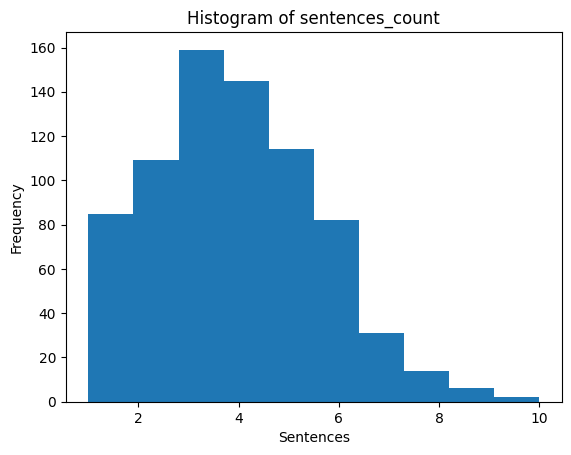

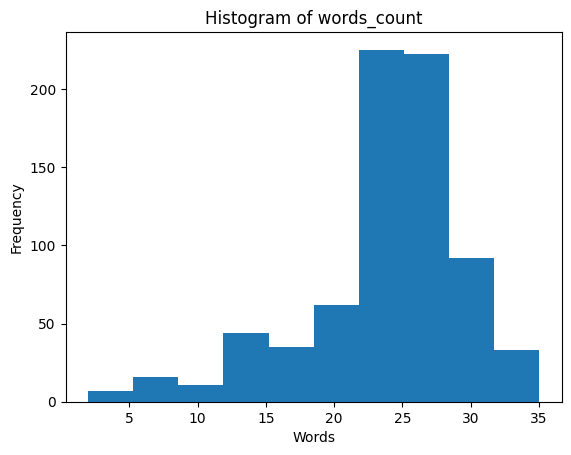

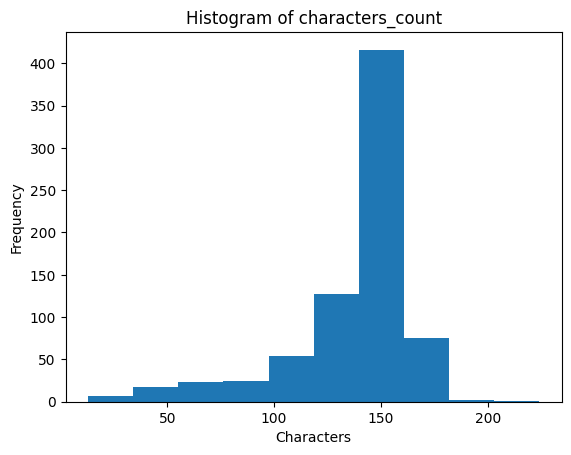

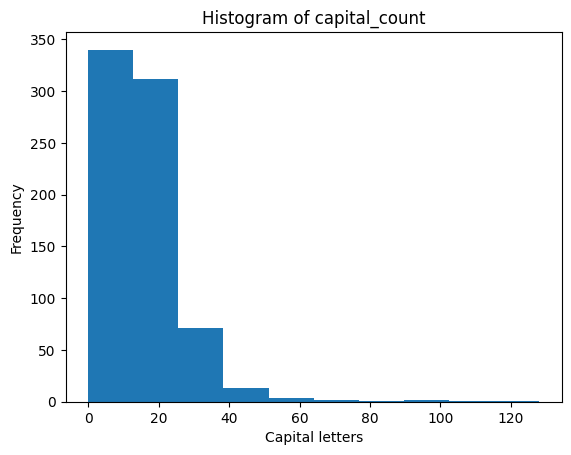

In [59]:
import matplotlib.pyplot as plt

# Feature functions
def count_sentences(text):
    parts = re.split(r'[.!?]+', str(text))
    return sum(1 for p in parts if p.strip() != "")

def count_words(text):
    return len(str(text).split())

def count_chars(text):
    return len(str(text))

def count_capitals(text):
    return sum(1 for c in str(text) if c.isupper())

# Compute features
spamonly["sentences_count"] = spamonly["v2"].apply(count_sentences)
spamonly["words_count"] = spamonly["v2"].apply(count_words)
spamonly["characters_count"] = spamonly["v2"].apply(count_chars)
spamonly["capital_count"] = spamonly["v2"].apply(count_capitals)

# Plot histograms (each in separate figure)
plt.figure()
plt.hist(spamonly["sentences_count"])
plt.title("Histogram of sentences_count")
plt.xlabel("Sentences")
plt.ylabel("Frequency")
plt.show()

plt.figure()
plt.hist(spamonly["words_count"])
plt.title("Histogram of words_count")
plt.xlabel("Words")
plt.ylabel("Frequency")
plt.show()

plt.figure()
plt.hist(spamonly["characters_count"])
plt.title("Histogram of characters_count")
plt.xlabel("Characters")
plt.ylabel("Frequency")
plt.show()

plt.figure()
plt.hist(spamonly["capital_count"])
plt.title("Histogram of capital_count")
plt.xlabel("Capital letters")
plt.ylabel("Frequency")
plt.show()

In [64]:
from sklearn.preprocessing import LabelEncoder

# encode target
le = LabelEncoder()
df_no_duplicates_all['target_encoded'] = le.fit_transform(df_no_duplicates_all['v1'])

# feature functions
def count_sentences(text):
    parts = re.split(r'[.!?]+', str(text))
    return sum(1 for p in parts if p.strip() != "")

def count_words(text):
    return len(str(text).split())

def count_chars(text):
    return len(str(text))

def count_capitals(text):
    return sum(1 for c in str(text) if c.isupper())

# compute features
df_no_duplicates_all['sentences_count'] = df_no_duplicates_all['v2'].apply(count_sentences)
df_no_duplicates_all['words_count'] = df_no_duplicates_all['v2'].apply(count_words)
df_no_duplicates_all['numeric_count'] = df_no_duplicates_all['v2'].apply(count_chars)
df_no_duplicates_all['capital_count'] = df_no_duplicates_all['v2'].apply(count_capitals)

# compute correlations
corrs = df_no_duplicates_all[['sentences_count','words_count','characters_count','capital_count','target_encoded']].corr()['target_encoded']
corrs

,target_encoded
sentences_count,0.328902
words_count,0.286576
characters_count,0.384717
capital_count,0.337809
target_encoded,1.000000
